# InstaCart Dataset Market Analysis
### Programming For Data Science, Term Project, MEF University
### Mert Barbaros, barbarosm@mef.edu.tr

# Company and dataset overview

## Company: Instacart

Instacart is a delivery platform that partners with so-called shoppers to deliver groceries within hours of an order. The company partners with over 30 retailers across the United States and Canada.

The business model of Instacart is based on charging a delivery and service fee for every order made on its platform. The company furthermore makes money from receiving a share of the order volume, a subscription service (called Instacart Express), as well as premium ads served on its platform.

Founded in 2012 and headquartered in San Francisco, Instacart has grown to be North America’s leader in grocery deliveries. The company expects to generate $35 billion in grocery sales for 2020. The company is now able to reach 85 percent of all U.S. and 70 percent of all Canadian households.

Instacart is a food delivery and pick-up platform that lets you shop from local grocery stores online. The company partners up with over 300 retailers across the United States and Canada, amongst others ALDI, Costco, Kroger, or Sprouts. Once an order is placed, a so-called personal shopper will pick up your groceries and deliver them to your home. These shoppers are not full-time employees, but independent contractors that are only paid whenever they deliver an order.  

Once an order is made, potential shoppers in proximity receive a notification and can either accept or decline the request. The shopper that accepts the order then drives to the grocery store in question, picks up the items from the counter, and delivers them to the customer’s address. 

For more information about company, visit the following site: https://productmint.com/the-instacart-business-model-how-does-instacart-make-money/#:~:text=The%20business%20model%20of%20Instacart,ads%20served%20on%20its%20platform.

## Dataset

Dataset has taken by Kaggle : https://www.kaggle.com/c/instacart-market-basket-analysis/overview

Instacart provided 3 million orders called Online Grocery Shopping Dataset, in 2017. 

Here is the description of datafields:

orders (3.4m rows, 206k users):

order_id: order identifier
user_id: customer identifier
eval_set: which evaluation set this order belongs in (see SET described below)
order_number: the order sequence number for this user (1 = first, n = nth)
order_dow: the day of the week the order was placed on
order_hour_of_day: the hour of the day the order was placed on
days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1)
products (50k rows):

product_id: product identifier
product_name: name of the product
aisle_id: foreign key
department_id: foreign key
aisles (134 rows):

aisle_id: aisle identifier
aisle: the name of the aisle
deptartments (21 rows):

department_id: department identifier
department: the name of the department
order_products__SET (30m+ rows):

order_id: foreign key
product_id: foreign key
add_to_cart_order: order in which each product was added to cart
reordered: 1 if this product has been ordered by this user in the past, 0 otherwise
where SET is one of the four following evaluation sets (eval_set in orders):

prior: orders prior to that users most recent order (~3.2m orders)


## Data Analysis
 
I will start my analysis with importing necessary libraries. Then I will import dataset in csv format. 


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
%matplotlib inline

In [49]:
# let's import the dataset
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
prior_orders = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv')

## Dataset check 

In this part, I will briefly look to data tables and find the relevant problems about data.

In [52]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [53]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


There are no null values in ``àisles``table, dtypes are correct.

In [54]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [55]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


There are no null values in ```departments```data, and dtypes are correct.

In [56]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [57]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


There are no null values in ```orders```data, and dtypes are correct. However if there is no prior order of a customer, we see day_since_prior_order column value as NaN. We will replace it with zero.

Also order_dow is day of the week that order is placed, we will replace it with weekday name.

In [58]:
#We will replace NaN values with zero
orders[orders['days_since_prior_order'].isnull()]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN
...,...,...,...,...,...,...,...
3420930,969311,206205,prior,1,4,12,NaN
3420934,3189322,206206,prior,1,3,18,NaN
3421002,2166133,206207,prior,1,6,19,NaN
3421019,2227043,206208,prior,1,1,15,NaN


In [59]:
prior_orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [60]:
prior_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [61]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [62]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## Handling Missing Values and Denormalization 

First, I will replaced the null values at orders table, day_since_prior_order column with zero.

In [63]:
orders[orders['days_since_prior_order'].isnull()]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN
...,...,...,...,...,...,...,...
3420930,969311,206205,prior,1,4,12,NaN
3420934,3189322,206206,prior,1,3,18,NaN
3421002,2166133,206207,prior,1,6,19,NaN
3421019,2227043,206208,prior,1,1,15,NaN


In [64]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(value = 0)

In [65]:
orders[orders['days_since_prior_order'].isnull()]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


Next, let's add the original names of weekdays to data

In [66]:
#lets first create our conditions and values

conditions = [(orders['order_dow'] == 0),
              (orders['order_dow'] == 1),
              (orders['order_dow'] == 2),
              (orders['order_dow'] == 3),
              (orders['order_dow'] == 4),
              (orders['order_dow'] == 5),
              (orders['order_dow'] == 6)
             ]

values = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']

#then create new colmn called order_day 

orders['order_day'] = np.select(conditions, values)

In [67]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_day
0,2539329,1,prior,1,2,8,0.0,tuesday
1,2398795,1,prior,2,3,7,15.0,wednesday
2,473747,1,prior,3,3,12,21.0,wednesday
3,2254736,1,prior,4,4,7,29.0,thursday
4,431534,1,prior,5,4,15,28.0,thursday


In [72]:
#Now, we can rearrange the columns 
orders = orders[['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_day',
       'order_hour_of_day', 'days_since_prior_order']]

In [73]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_day,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,tuesday,8,0.0
1,2398795,1,prior,2,3,wednesday,7,15.0
2,473747,1,prior,3,3,wednesday,12,21.0
3,2254736,1,prior,4,4,thursday,7,29.0
4,431534,1,prior,5,4,thursday,15,28.0


Also, we can categorize the hour of the day data like ```night```, ```morning```, ```afternon```, ```evening```, etc.

Like in the previous operation, let's create our condition and values and create our column.

In [87]:
conditions = [( (orders['order_hour_of_day'] >= 0) & (orders['order_hour_of_day'] <= 6) ),
              (  (orders['order_hour_of_day'] > 6) & (orders['order_hour_of_day'] <= 12) ),
              ( (orders['order_hour_of_day'] > 12) & (orders['order_hour_of_day'] <= 18) ),
              ( (orders['order_hour_of_day'] > 18) & (orders['order_hour_of_day'] <= 23) ),
             ]

values = ['night', 'morning', 'afternoon', 'evening']

orders['day_segment'] = np.select(conditions, values) 

In [88]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_day,order_hour_of_day,days_since_prior_order,day_segment
0,2539329,1,prior,1,2,tuesday,8,0.0,morning
1,2398795,1,prior,2,3,wednesday,7,15.0,morning
2,473747,1,prior,3,3,wednesday,12,21.0,morning
3,2254736,1,prior,4,4,thursday,7,29.0,morning
4,431534,1,prior,5,4,thursday,15,28.0,afternoon


In [89]:
#Now, we can rearrange the columns 
orders = orders[['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_day',
       'order_hour_of_day','day_segment', 'days_since_prior_order']]

In [90]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_day,order_hour_of_day,day_segment,days_since_prior_order
0,2539329,1,prior,1,2,tuesday,8,morning,0.0
1,2398795,1,prior,2,3,wednesday,7,morning,15.0
2,473747,1,prior,3,3,wednesday,12,morning,21.0
3,2254736,1,prior,4,4,thursday,7,morning,29.0
4,431534,1,prior,5,4,thursday,15,afternoon,28.0


In [92]:
prior_orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


## Basket Analysis

In this part, I will make a basket analysis and create some insights related to marketing.

### Customer Frequency Analysis

```Customer frequency``` describes the pattern of purchase across customer database or how often customer purchase a product. We can create a customer frequency analysis based on number of purcase in every year (we have orders from 2017 so we will make yearly analysis), based on department, aisles and product. 

#### Customer Frequency Analysis Based On Purchases 

Becasue we are interested with only number of purchases, we will use ```orders``` table. First, we will calculate the number of purchases of every ```user_id```.


In [170]:
purchase_frequency = orders.groupby(by =['user_id'], as_index = True).aggregate({'order_number' : 'max'})

In [166]:
purchase_frequency.describe()

,order_number
count,206209.000000
mean,16.590367
std,16.654774
min,4.000000
25%,6.000000
50%,10.000000
75%,20.000000
max,100.000000


As we can see from the describe method, customers made 16.5 orders in average during the 2017 with standard deviation 16.5 for 206.209 customers. Min number of orders is 4 and max number of orders is 100. Let's create bins and summarize the frequency analysis

In [212]:
bins = [3, 10 , 21 , 31 , 41, 51, 71, 91, 101]

freq_bins  = pd.DataFrame(pd.cut(purchase_frequency['order_number'], bins)) 

In [214]:
freq_bins.reset_index(inplace = True)

In [215]:
freq_bins

,user_id,order_number
0,1,"(10, 21]"
1,2,"(10, 21]"
2,3,"(10, 21]"
3,4,"(3, 10]"
4,5,"(3, 10]"
...,...,...
206204,206205,"(3, 10]"
206205,206206,"(51, 71]"
206206,206207,"(10, 21]"
206207,206208,"(41, 51]"


We created the purhcase segemtns, not let's calculate the bin sizes

In [248]:
purchase_freq = freq_bins.groupby(by= ['order_number']).agg('count').reset_index()
purchase_freq.rename(columns = {'user_id': 'number_of_orders' , 'order_number' : 'order_segment'}, inplace = True)

In [249]:
purchase_freq

,order_segment,number_of_orders
0,"(3, 10]",104513
1,"(10, 21]",53886
2,"(21, 31]",20101
3,"(31, 41]",10692
4,"(41, 51]",6689
5,"(51, 71]",6247
6,"(71, 91]",2232
7,"(91, 101]",1849


Text(0.5, 1.0, 'Frequency vs. Orders')

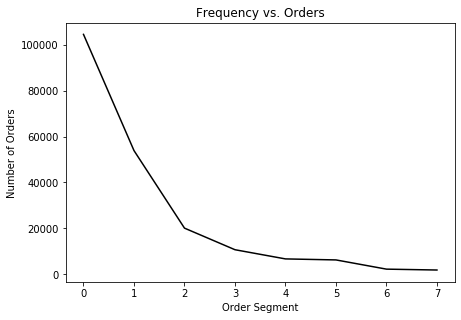

In [253]:
fig1 = plt.figure()
axes = fig1.add_axes([0.3, 0.3, 0.9 , 0.9])
axes.plot(purchase_freq['order_segment'], purchase_freq['number_of_orders'], color = 'black')
axes.set_xlabel("Order Segment")
axes.set_ylabel("Number of Orders")
axes.set_title("Frequency vs. Orders")

Now'lets calculate the % of customers in each segment

In [273]:
purchase_freq['percentage_customers'] = purchase_freq['number_of_orders'] / purchase_freq['number_of_orders'].sum()

In [274]:
purchase_freq

,order_segment,number_of_orders,percentage_customers
0,"(3, 10]",104513,0.506830
1,"(10, 21]",53886,0.261317
2,"(21, 31]",20101,0.097479
3,"(31, 41]",10692,0.051850
4,"(41, 51]",6689,0.032438
5,"(51, 71]",6247,0.030295
6,"(71, 91]",2232,0.010824
7,"(91, 101]",1849,0.008967


In [275]:
purchase_freq['percentage_customers'] = purchase_freq['percentage_customers'] * 100

In [277]:
purchase_freq['percentage_customers'] = round(purchase_freq['percentage_customers'], 2)

In [278]:
purchase_freq

,order_segment,number_of_orders,percentage_customers
0,"(3, 10]",104513,50.68
1,"(10, 21]",53886,26.13
2,"(21, 31]",20101,9.75
3,"(31, 41]",10692,5.19
4,"(41, 51]",6689,3.24
5,"(51, 71]",6247,3.03
6,"(71, 91]",2232,1.08
7,"(91, 101]",1849,0.90


As we can see from the data, %51 of customers are in the 3-10 orders segment. Which means, company needs to upgrade those customers with appropriate campaigns. Another thing we can explore is explicitly look to number of orders vs number of customers

Text(0, 0.5, 'Number of Customers')

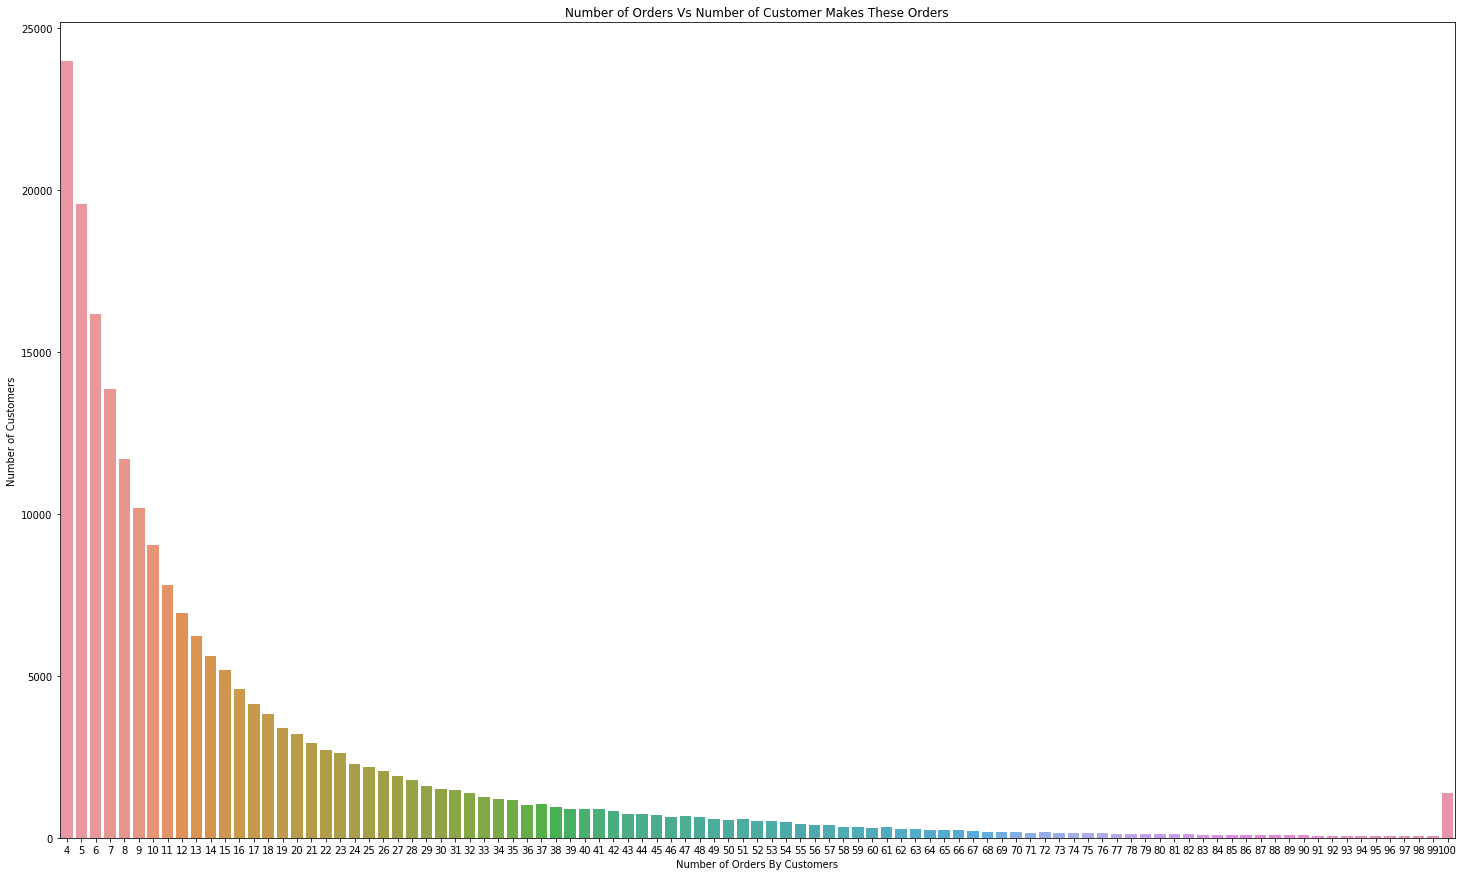

In [438]:
orders_per_customer=orders.groupby("user_id")["order_number"].max().reset_index()

plt.figure(figsize=(25,15))
sns.countplot(orders_per_customer["order_number"])
plt.title("Number of Orders Vs Number of Customer Makes These Orders")
plt.xlabel("Number of Orders By Customers")
plt.ylabel("Number of Customers")

#### Product & Aisles Purchase Frequency

Similarly, we can calculate the frequency based on product, aisles and department.In ```prior_orders```table, there is a product information. We can create a new table with order_id, product, customer, aisles and department

In [285]:
prior_orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [286]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [288]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [289]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [290]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_day,order_hour_of_day,day_segment,days_since_prior_order
0,2539329,1,prior,1,2,tuesday,8,morning,0.0
1,2398795,1,prior,2,3,wednesday,7,morning,15.0
2,473747,1,prior,3,3,wednesday,12,morning,21.0
3,2254736,1,prior,4,4,thursday,7,morning,29.0
4,431534,1,prior,5,4,thursday,15,afternoon,28.0


First, we should merge data based on common elements.

In [291]:
order_product =  pd.merge(left = prior_orders, right = products, on = 'product_id')

In [292]:
order_product.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


Then, let's add the aisle then the department name

In [294]:
product_analysis = pd.merge(left = order_product, right = aisles, on = 'aisle_id')

In [295]:
product_analysis

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs
...,...,...,...,...,...,...,...,...
32434484,1669471,29951,6,0,Ruby Port Wine,134,5,specialty wines champagnes
32434485,2020661,29951,7,1,Ruby Port Wine,134,5,specialty wines champagnes
32434486,2736620,29951,2,0,Ruby Port Wine,134,5,specialty wines champagnes
32434487,3259311,29951,2,0,Ruby Port Wine,134,5,specialty wines champagnes


In [296]:
product_analysis = pd.merge(left = product_analysis, right = departments, on = 'department_id')

In [297]:
product_analysis.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs,dairy eggs


In [302]:
#we only need user_id, so we will define it as a target column
product_analysis = pd.merge(left = product_analysis, right = orders[['order_id', 'user_id']],
                            on = 'order_id', how = 'inner')

In [303]:
product_analysis.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279
2,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279
3,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279
4,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279


In [304]:
#lets drop the unncessary columns

product_analysis.drop(columns = ['aisle_id', 'department_id', 'product_id'], inplace = True)
product_analysis = product_analysis[['user_id','order_id', 'product_name','aisle','department']]

In [305]:
product_analysis.head()

,user_id,order_id,product_name,aisle,department
0,202279,2,Organic Egg Whites,eggs,dairy eggs
1,202279,2,Michigan Organic Kale,fresh vegetables,produce
2,202279,2,Carrots,fresh vegetables,produce
3,202279,2,Classic Blend Cole Slaw,packaged vegetables fruits,produce
4,202279,2,Garlic Powder,spices seasonings,pantry


We can include time analysis to that table. So we can grab the day and hour segment from orders table.

In [306]:
product_analysis = pd.merge(left = product_analysis, right = orders[['order_id', 'order_day', 'day_segment']], 
                           on = 'order_id')

In [307]:
product_analysis.head()

,user_id,order_id,product_name,aisle,department,order_day,day_segment
0,202279,2,Organic Egg Whites,eggs,dairy eggs,friday,morning
1,202279,2,Michigan Organic Kale,fresh vegetables,produce,friday,morning
2,202279,2,Carrots,fresh vegetables,produce,friday,morning
3,202279,2,Classic Blend Cole Slaw,packaged vegetables fruits,produce,friday,morning
4,202279,2,Garlic Powder,spices seasonings,pantry,friday,morning


First,let's explore the department performance in 2017. ``nunique``will return the unique count of user_ids.

In [329]:
department_performance = product_analysis.pivot_table(index = 'department',
                                                     aggfunc = {'order_id': 'count', 'user_id': 'nunique'})

In [330]:
department_performance.head()

,order_id,user_id
department,,
alcohol,153696,15798
babies,423802,33730
bakery,1176787,140612
beverages,2690129,172795
breakfast,709569,114169


Now we can calculate the department frequency.

In [331]:
department_performance['department_frequency'] = department_performance['order_id'] / department_performance['user_id']

In [332]:
department_performance.head()

,order_id,user_id,department_frequency
department,,,
alcohol,153696,15798,9.728826
babies,423802,33730,12.564542
bakery,1176787,140612,8.369037
beverages,2690129,172795,15.568327
breakfast,709569,114169,6.215076


Now, let's rename the columns with appropriate name and sort descending.

In [336]:
department_performance.rename(columns = {'order_id': 'number_of_orders', 'user_id': 'number_of_customers'}, 
                              inplace = True)

In [338]:
department_performance = department_performance.sort_values(['department_frequency'], 
                                                            ascending = [False])

In [339]:
department_performance

,number_of_orders,number_of_customers,department_frequency
department,,,
produce,9479291,193237,49.055259
dairy eggs,5414016,190565,28.410338
snacks,2887550,174219,16.574254
beverages,2690129,172795,15.568327
frozen,2236432,163233,13.700857
babies,423802,33730,12.564542
pantry,1875577,172755,10.856861
alcohol,153696,15798,9.728826
bakery,1176787,140612,8.369037


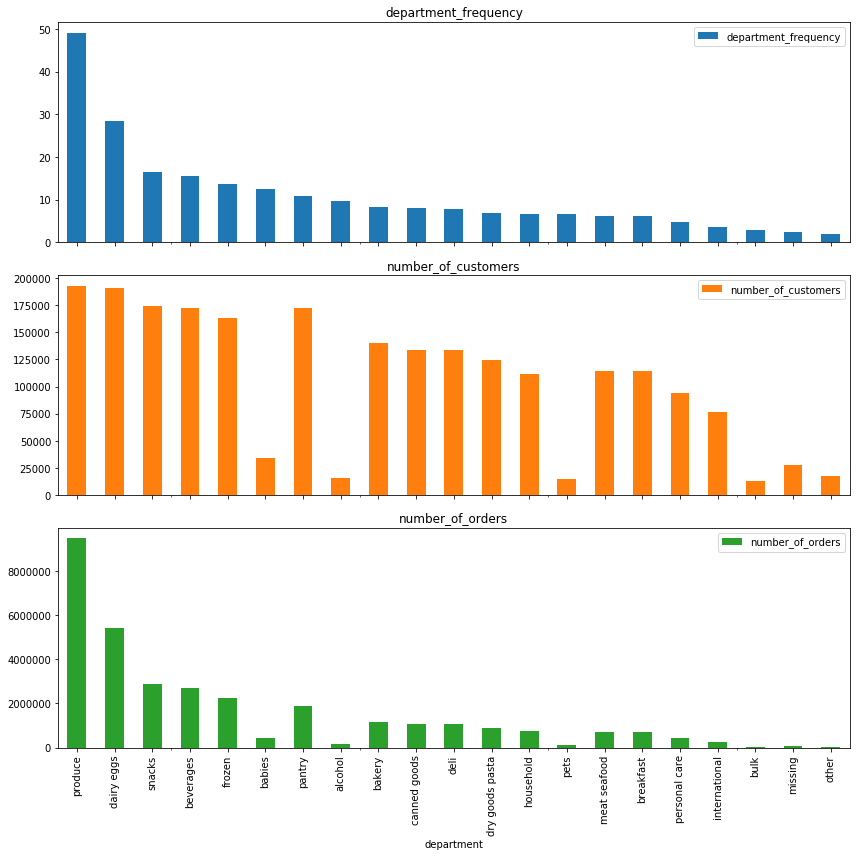

In [361]:
ax = department_performance.plot.bar(y = ['department_frequency', 'number_of_customers', 
                                         'number_of_orders'], subplots = True, figsize = (12,12))

ax[1].legend(loc = 0)
plt.tight_layout()

Another important insight is relationship with number of orders and frequency

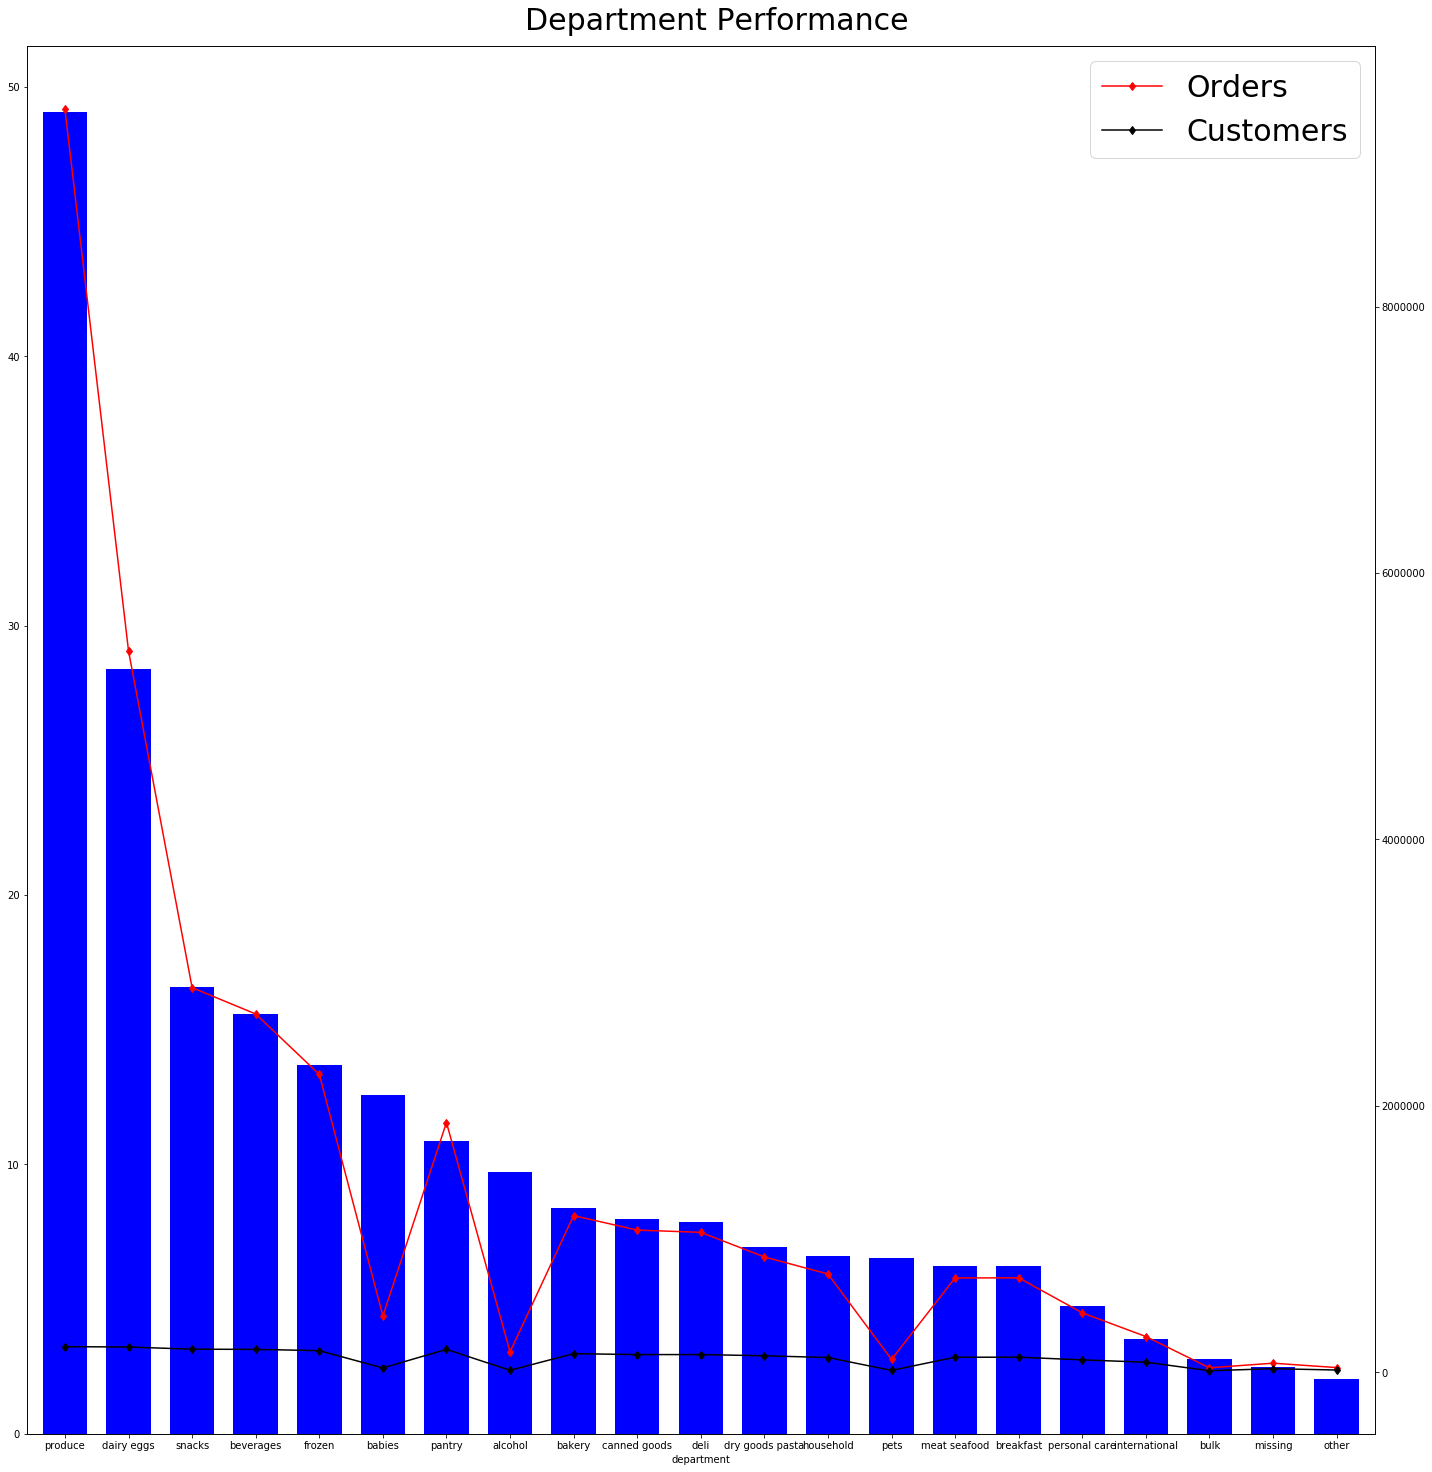

In [437]:
fig, ax = plt.subplots(figsize = (20,20))
plt.suptitle("Department Performance",y = 1.02, fontsize = 30)

department_performance['department_frequency'].plot(kind = 'bar', color = 'blue' ,
                                                   label = 'Frequency', width = 0.7)
department_performance['number_of_orders'].plot(kind='line', marker='d', color = 'red', secondary_y = True,
                                               label = 'Orders')
department_performance['number_of_customers'].plot(kind='line', marker='d', color = 'black', secondary_y = True,
                                                  label = 'Customers')
plt.tight_layout()
plt.legend(fontsize = 30)
